# Two-stream instability with UPIC-ES

##  F. S. Tsung & K. G. Miller

A two-stream instability occurs when two species (either the same or different) in a plasma have equal but opposite drift velocities, $v_0$. Depending on the physical parameters, modes can then arise which are unstable and grow exponentially. 

To begin, we derive the general dispersion relation for these instabilities for two different (but not necessarily identical) species with two different drift velocities.


## General dispersion relation

Consider two cold species, which we will generically label species 1 and species 2, each with constant drift velocity $\vec{v}_{0,1}$ and $\vec{v}_{0,2}$ and fluctuating velocity $\tilde{\vec{v}}_1$ and $\tilde{\vec{v}}_2$, respectively. The linearized Navier-Stokes equation for each species is then

$$ \frac{d}{d t} \tilde{\vec{v}}_s = \frac{\partial}{\partial t} \tilde{\vec{v}}_s + \vec{v}_{0,s} \cdot \nabla \tilde{\vec{v}}_s = \frac{q_s}{m_s} \tilde{\vec{E}}. $$

In addition, the continuity equation for each species is

$$ \frac{\partial}{\partial t} \tilde{n}_s + n_{0,s} \nabla \cdot \tilde{\vec{v}}_s + \vec{v}_{0,s} \cdot \nabla \tilde{n}_s = 0. $$

Poisson's equation then yields

$$ \nabla \cdot \tilde{\vec{E}} = 4\pi \sum_{s}q_s \tilde{n}_s. $$

If we assume a plane wave solution of the form $\tilde{\vec{E}} = \vec{E}_0 e^{i(\vec{k} \cdot \vec{r} - \omega t)}$, then the dynamical equation turns into

$$ (-i\omega + i \vec{k} \cdot \vec{v}_{0,s})\tilde{\vec{v}}_s = \frac{q_s}{m_s} \tilde{\vec{E}} \\
\Rightarrow \tilde{\vec{v}}_s = \frac{q_s \tilde{\vec{E}}}{i m_s (-i\omega + i \vec{k} \cdot \vec{v}_{0,s})}. $$

Similarly, the continuity equation can be rewritten as

$$ -i\omega \tilde{n}_s + i n_{0,s} \vec{k} \cdot \tilde{\vec{v}}_s + i \vec{k} \cdot \vec{v}_{0,s} \tilde{n}_s = 0 \\
\Rightarrow \tilde{n}_s = \frac{n_{0,s} \vec{k} \cdot \tilde{\vec{v}}_s}{\omega - \vec{k} \cdot \vec{v}_{0,s}} = \frac{-q_s n_{0,s} \vec{k} \cdot \tilde{\vec{E}}}{i m_s (\omega - \vec{k} \cdot \vec{v}_{0,s})^2}. $$

If we substitute this expression for $\tilde{n}_s$ into Poisson's equation, after rearranging we find that

$$ \left(1 - \sum_s\frac{\omega_{p,s}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,s})^2}\right)i \vec{k} \cdot \tilde{\vec{E}} = 0. $$

Recognizing that $\nabla \cdot \tilde{\vec{D}} = \nabla \cdot (\epsilon \tilde{\vec{E}}) = \epsilon \vec{k} \cdot \tilde{\vec{E}}$, the term in parenthesis is then our dielectric constant. Setting this equal to zero gives the dispersion relation as

\begin{equation}
1 - \frac{\omega_{p,1}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,1})^2} - \frac{\omega_{p,2}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,2})^2} = 0. 
\end{equation}

This equation can be used for various types of two-stream instabilities, for which the parameters $\omega_{p,s}$ and $\vec{v}_{0,s}$ can be adjusted. Now let us consider the case where the two species are identical with opposite drift velocities of the same magnitude.

## Two-stream instability

If the two species in question are simply counter-propagating electron beams of speed $\vec{v}_0$ with no temperature, then we can rewrite the above dispersion relation. Let $v_{0,1}=v_{0,2}=v_0$, $\omega_{p,1}=\omega_{p,2}= \omega_{pe}$, and define $x \equiv \omega/\omega_{pe}$ and $\alpha \equiv \vec{k} \cdot \vec{v}_0/\omega_{pe}$. This gives a dispersion relation of

$$ 1=\frac{1}{(x - \alpha)^2}+\frac{1}{(x+\alpha)^2}. $$

Solving the dispersion relation yields

$$ x^2 = 1 + \alpha^2 \pm \sqrt{1+4\alpha^2}, \\
\alpha \gg 1 \Rightarrow x \approx \alpha \pm 1. $$

However, we desire imaginary $\omega$ to have a growing mode, so solving for when $x=0$ gives

$$ 0 = 1 + \alpha^2 \pm \sqrt{1+4\alpha^2},\\
\Rightarrow \alpha\leq\sqrt{2}. $$

The fastest-growing mode occurs when $\frac{dx}{d\alpha}=0$, or $\alpha=\sqrt{3}/2 \approx 0.87 (\approx 1)$. The dispersion relation is plotted in the following figure.  The resonance condition, or the value for the most unstable mode number is therefore

\begin{equation}
k_{max} = 0.87 \frac{\omega_p}{v_0}
\end{equation}

From the above equation, one can see that the growth rate follows a universal curve in units of $\alpha$ and $\omega/\omega_{pe} \equiv x$.  For the rest of the notebook, we will discuss the system in these units, but first we will briefly go over the units of the simulation code UPIC-ES.

<img src="two_real.png">

# Simulations with a Particle-in-Cell Code

In [2]:
#Edit some things below

In this project, you will be simulating plasmas with the electrostatic code UPIC-ES.   The normalization of the code is $\omega_p = 1$, and the grid size $\Delta x = 1$.  Therefore, velocity is measured in units of [$\Delta x \omega_p$].


Each plasma electron is initialized with positions (only in x) such that the density is uniform. The ions are initialized at the same positions but they have an infinite mass.  Each electron is also initialized with velocities ($v_1$, $v_2$, $v_3$) or momentum ($mv_1$, $mv_2$, $mv_3$) from a Maxwellian in each direction. The particles then begin to move in the self-consistent fields that their charge density produce, from the Poisson's law:

\begin{equation}
\nabla^2 \phi = \rho
\end{equation}



You will be looking at plots of the electrostatic potential, $\phi$. 

### The following lines must always be executed before running anything else.

Reminder: Hit Shift+Enter to run a cell, or select the cell and click on the "Run" button in the top menu bar

In [1]:
import sys                                    # comment out in main version
sys.path.insert(0, '/home/jovyan/analysis')   # comment out in main version

In [2]:
import osiris
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *
plt.rc('font',size=24,family="serif")
%matplotlib inline

## Case 0 (prelude):  Two streams with the same velocity ($v_0=3 \Delta x \omega_{pe}$)

In [3]:
dirname = 'onestream'
osiris.run_upic_es(rundir=dirname,inputfile='1stream.txt')

run_upic_es completed normally


In this case, there is no instability. Running with only one species at the same drift velocity results in a simple shift of the electron-plasma wave dispersion relation by $\vec{k}\cdot\vec{v}_0$. Thus instead of $ \omega^2 = \omega_p^2 + 3 v_{the}^2 k^2 $, the dispersion relation is simply Doppler-shifted plasma waves, i.e., $\omega_{\pm} = \pm \sqrt{2}\omega_{pe} + k v_0$, where the factor of $\sqrt{2}$ comes from the fact that there are two cold beams and $v_{the}\approx 0$.

After the simulation is finished, plot the dispersion relation (run the next cell). 
* Does the dispersion relation follow what we expected?
* What is the slope of the lines?


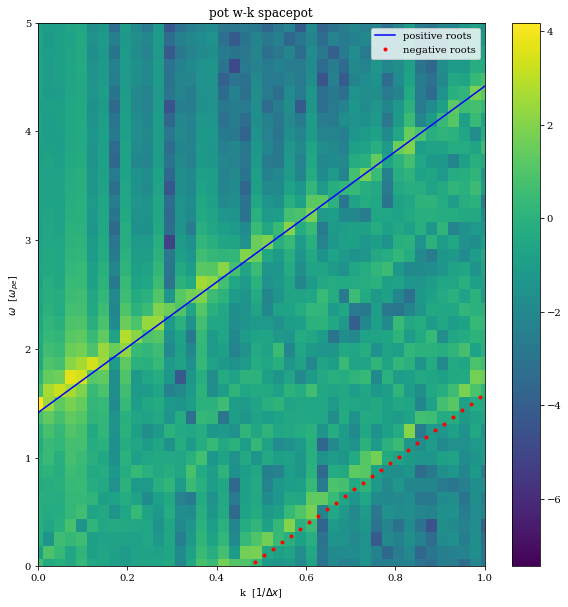

In [4]:
dirname = 'onestream'

v0=3
nk=100
k_array=np.linspace(0,2,num=nk)
omega_plus=np.zeros(nk)
omega_minus=np.zeros(nk)
# plt.figure(figsize=(10,10))
for ik in range(0,nk):
    omega_minus[ik]=-np.sqrt(2)+v0*k_array[ik]
    omega_plus[ik]=np.sqrt(2)+v0*k_array[ik]
    

osiris.plot_wk_arb(rundir=dirname, field='pot',TITLE='pot',wlim=5, klim=1,plot_show=False)
plt.plot(k_array,omega_plus,'b-',label='positive roots')
plt.plot(k_array,omega_minus,'r.',label='negative roots')
plt.legend()
plt.show()

Next, plot the potential in real space and through time. Note the slant of constant slope? 
* What is the slope?
* What does the constant slope imply?

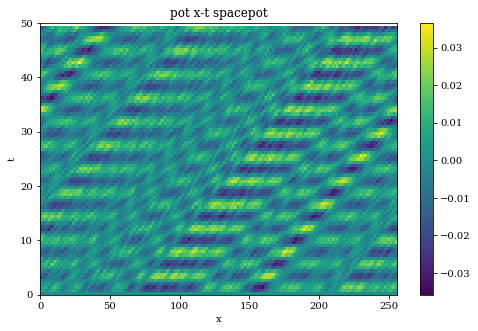

In [5]:
dirname = 'onestream'

osiris.plot_xt_arb(rundir=dirname, field='pot',tlim=[0,50])

Next, plot the phase space for the one-stream case. This should just be a thermal plasma with an offset velocity.
* Does the phase space change in time?
* Do we expect it to?

In [6]:
dirname='onestream'

osiris.phaseinteract_upic(rundir=dirname)

interactive(children=(IntSlider(value=6, description='n', max=12), Output()), _dom_classes=('widget-interact',))

----------
Below are 3 different cases of the two stream instability.  In the first example, we use the drift velocity of $\pm 9 \Delta x \omega_{p}$ in UPIC-ES units.  In the first example, the drift velocity is deliberately kept "high" (in comparison to other cases in this notebook) to keep the number of unstable modes small and to keep the physics simple.

## Case 1 :  $V_0=\pm9 \Delta x \omega_p$

In these units, the instabilities will occur within the range of:

\begin{equation}
0 < k < \frac{\sqrt{2}}{9}\approx 0.157 (\Delta x)^{-1}
\end{equation}

In this particular simulation, we are using 128 cells.  Therefore, the fundamental mode number of the simulation box is:

\begin{equation}
k_0 = \frac{2 \pi}{L} = \frac{2 \pi}{128 \Delta x} = 0.0491 \Delta x^{-1}
\end{equation}

So in this system, only modes 1-3 are unstable according to theory, with the largest having a growth rate of $\approx 0.5 \omega_p$.  The simulation runs for 80 $\omega_p^{-1}$, or 160 growth time for the most unstable modes.  We try to keep the system as simple as possible for our first example.  

The rest of the simulation parameters are:


* The length of the plasmas is 128 grids
* The simulation will run for a time 80 $1/\omega_p$.
* The simulation uses $2^{18} \equiv 256K$ particles.
* Beam velocity for each beam is $10^{-5} \Delta x \omega_p$ (which provides a small amount of noise to trigger the instability).


### Run the cell below to obtain the theoretical dispersion relation for this case

The instability peaks roughly at $0.09 \Delta x^{-1}$, which is roughly mode 2 of the simulation box (128 $\Delta x$ long).

The modes of the simulation box is marked as circles in the plot.

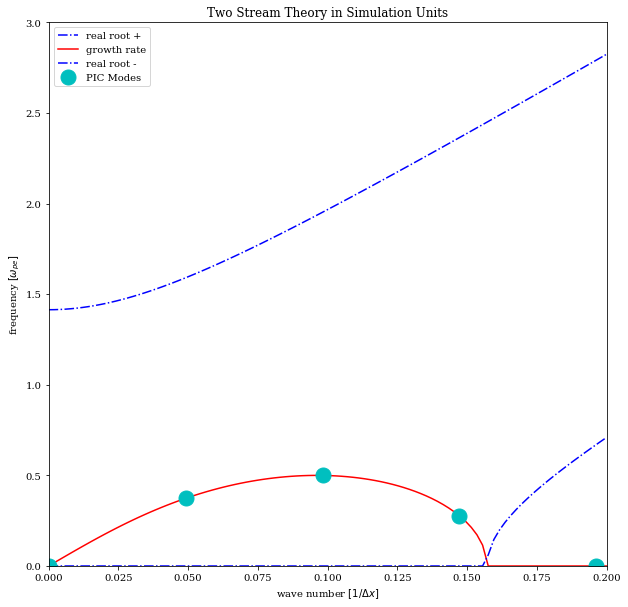

In [2]:
# first let's define the k-axis

################################################################
################################################################
## need the simulation size to make the simulation curve
################################################################
################################################################

kmin=0
kmax=0.2

v0=9.0

nx = 128

osiris.tstream_plot_theory(v0,nx,kmin,kmax)

### Run the simulation:

In [7]:
dirname = 'twostream-2'
osiris.run_upic_es(rundir=dirname,inputfile='2stream-2.txt')

run_upic_es completed normally


Run the cell below to look at the electrostatic potential as a function of time for the various modes in the simulation.

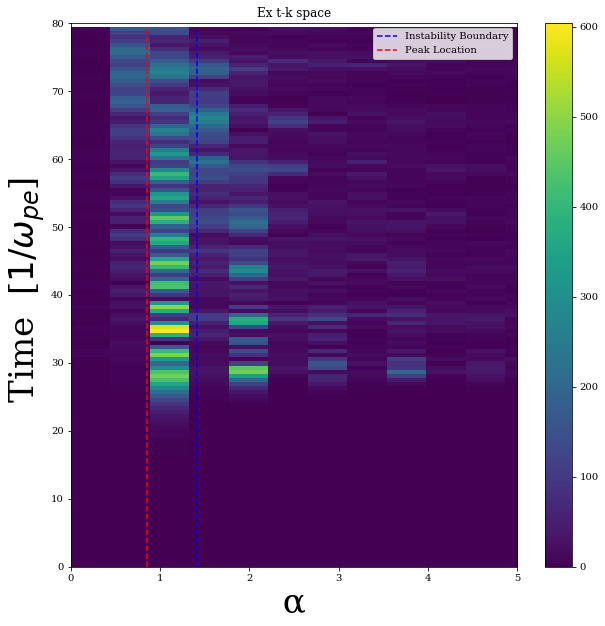

In [8]:
dirname = 'twostream-2'


osiris.plot_tk_2stream(dirname,'Ex',klim=5,tlim=80,v0=9)

You can observe that the signal occurs near the modes where instability is predicted.   The blue vertical line indicates where the growth rate goes to 0 (at $\alpha = \sqrt{2}$).  There should be no instability to the right of the plot.  The red vertical line indicates the location of the most unstable mode ($\alpha = \sqrt{3}/2 \approx 0.87$).   

* Do the simulation results agree with theory?
    
* What are the sources of the noise for signals whose wavenumber to the right of the BLUE line?
    
    

-----
Next we'll look at the mode histories in greater detail, and compare the simulation data against theory.

Plot the electrostatic potential modes individually and compare their growth rate to the theoretical growth rate.

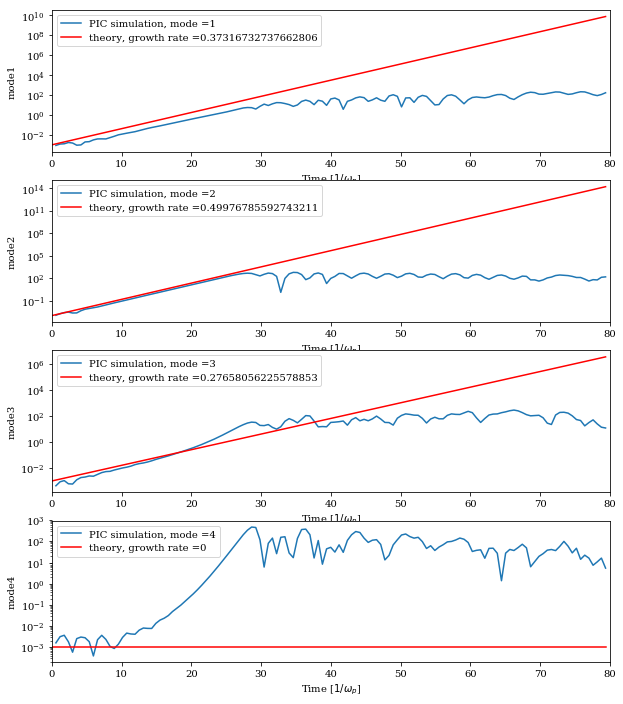

In [10]:


###  Here we compare results against theory
dirname = 'twostream-2'


osiris.plot_tk_2stream_theory(dirname,'Ex',modemin=1,modemax=4,tlim=80,v0=9,init_amplitude=1e-3)




Plot the evolution of the electrostatic potential in real space.

* Is there a point in time at which the potential ceases to grow?  Do you expect the field to grow without bounds or is there a physical reason for the growth to stop?


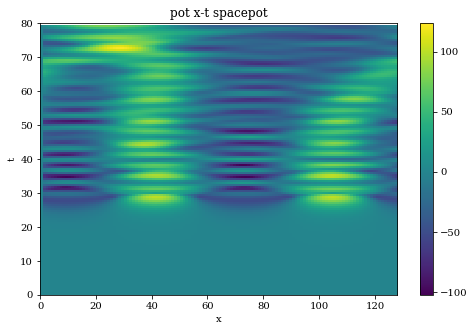

In [11]:
dirname = 'twostream-2'

#osiris.plot_wk_arb(rundir=dirname, field='pot', TITLE='potential',wlim=4, klim=3)
osiris.plot_xt_arb(rundir=dirname, field='pot' ,tlim=[0,80],xlim=[0,128])

Finally, here we visualize the evolution of the electron phase space (x,vx).

* Questions...

In [12]:
# Here you can see the evolution of phase space

dirname='twostream-2'

osiris.phaseinteract_upic(rundir=dirname)

interactive(children=(IntSlider(value=9, description='n', max=19), Output()), _dom_classes=('widget-interact',))

## Case 1(b), $V_0=\pm9 \Delta x \omega_p$, no thermal fluctuations:

The instability takes thermal fluctuations from the beams and amplifies them.  To demonstrate this, we will run a simulation with no thermal velocity.  In this case, the fluctuation level is exactly 0 in the beginning, and the instability will stay "linear" for much longer.  The simulation is identical to the first case, except:

* Initial thermal velocity is 0 

* Double the particle number



In [13]:
dirname = 'twostream-quiet'
osiris.run_upic_es(rundir=dirname,inputfile='2stream-quiet.txt')

run_upic_es completed normally


Let's look at the two cases side-by-side.  The quiet case is on top and the original (noisy) case is on the bottom. You can see how the instability is triggered by noise from the system.  Note that, in the quiet case, the instability starts much later, and it barely reaches saturation at the end of the simulation (@ t=$80 \omega_p^{-1}$).  In the noisy case, the instability becomes visible much earlier, and reaches saturation by t= $50 \omega_p^{-1}$.


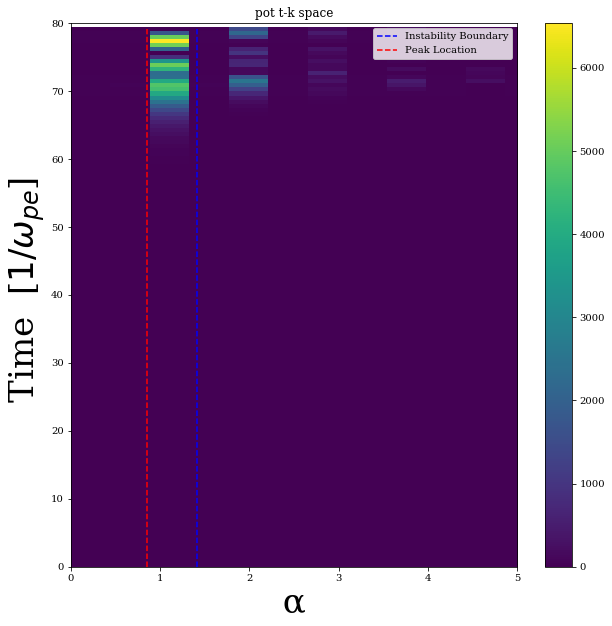

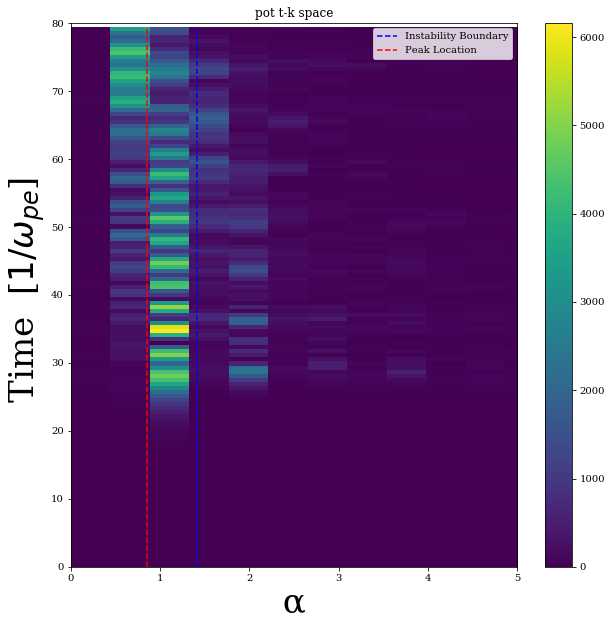

In [14]:


dirname = 'twostream-quiet'

osiris.plot_tk_2stream(dirname,'pot',klim=5,tlim=80,v0=9)

dirname = 'twostream-2'


osiris.plot_tk_2stream(dirname,'pot',klim=5,tlim=80,v0=9)

Once again plot the electrostatic potential modes individually and compare their growth rate to the theoretical growth rate.

* Is the agreement better or worse than the noisy case?

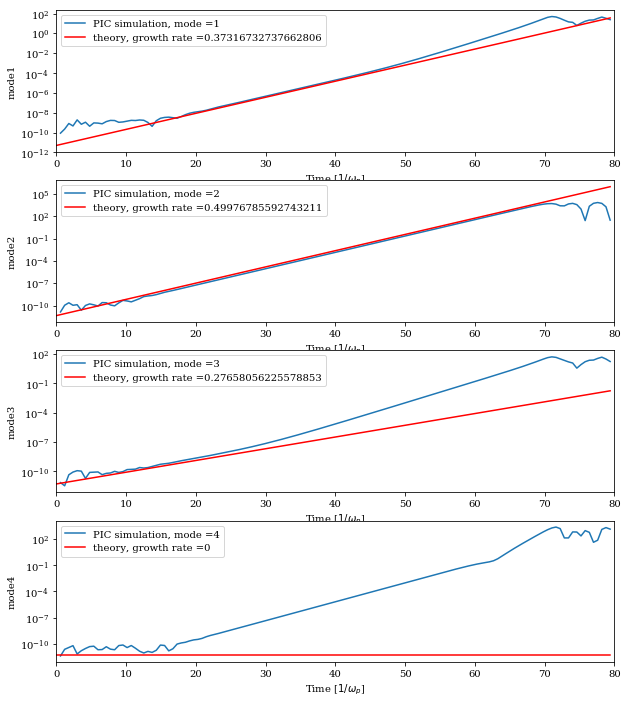

In [15]:
###  Here we compare results against theory
dirname = 'twostream-quiet'


osiris.plot_tk_2stream_theory(dirname,'pot',modemin=1,modemax=4,tlim=80,v0=9,init_amplitude=5e-12)


Plot the electrostatic potential through time.

* What is different from the noisy case?  (How long does it take the potential to grow and saturate?)

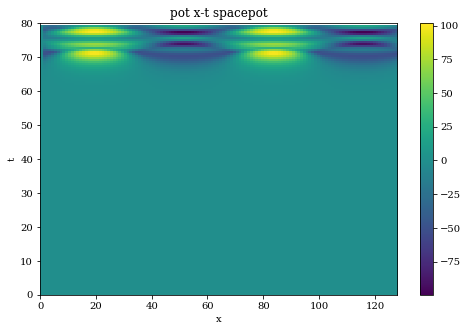

In [16]:
dirname = 'twostream-quiet'

#osiris.plot_wk_arb(rundir=dirname, field='pot', TITLE='potential',wlim=4, klim=3)
osiris.plot_xt_arb(rundir=dirname, field='pot' ,tlim=[0,80],xlim=[0,128])

Visualize the phase space of the particles.

* What is different from the noisy case?

In [17]:
# Here you can see the evolution of phase space

dirname='twostream-quiet'

osiris.phaseinteract_upic(rundir=dirname)

interactive(children=(IntSlider(value=9, description='n', max=19), Output()), _dom_classes=('widget-interact',))


## Case 2:  $V_0=\pm5 \Delta x \omega_{pe}$

To increase the number of unstable modes with UPIC, there are two ways to go.   One way is to increase the system length, this will improve the resolution in $\hat{k}$ space and increase the number of unstable modes within the same interval.  Another way to go is to decrease the drift velocity, because the instability occurs within the range of $0 < \alpha\equiv k v_0/\omega_p < \sqrt{2}$, decreasing $v_0$ will increase the number of unstable modes in the same range of $\hat{k}$.  

In the previous simulation, modes 1-3 are unstable.  In this case, we double the size of the simulation and reduce the drift velocity by a factor of 1.8  (from 9 to 5).  So in this case, modes 1-11 are unstable w.r.t. the two-stream instability.  In this example, we will see how well the simulation agrees with theory when there are a large number of unstable modes.

The simulation parameters are:

* The length of the plasmas is 256 grids
* The simulation will run for a time 60 $1/\omega_p$, stepsize is 0.2 $\omega_p^{-1}$, so the simulation has 300 timesteps.
* The simulation uses $2^{18} \equiv 256K$ particles.
* Beam velocity for each beam is $10^{-5} \Delta x \omega_p$ (which provides a small amount of noise to trigger the instability).




### First plot the theoretical dispersion relation below:

Notice the increased number of system modes for this case.

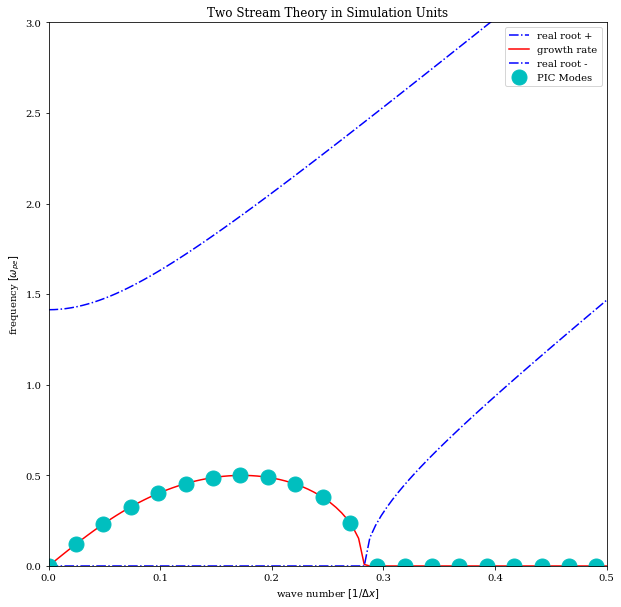

In [18]:


################################################################
################################################################
## need the simulation size to make the simulation curve
################################################################
################################################################

nx=256
kmin=0
kmax=0.5
v0=5

osiris.tstream_plot_theory(v0,nx,kmin,kmax)

Run the simulation

In [19]:
dirname = 'twostream'
osiris.run_upic_es(rundir=dirname,inputfile='2stream.txt')

run_upic_es completed normally


Run the cell below to look at the electrostatic potential as a function of time for the various modes in the simulation.

* How does the agreement compare with that of Case 1?

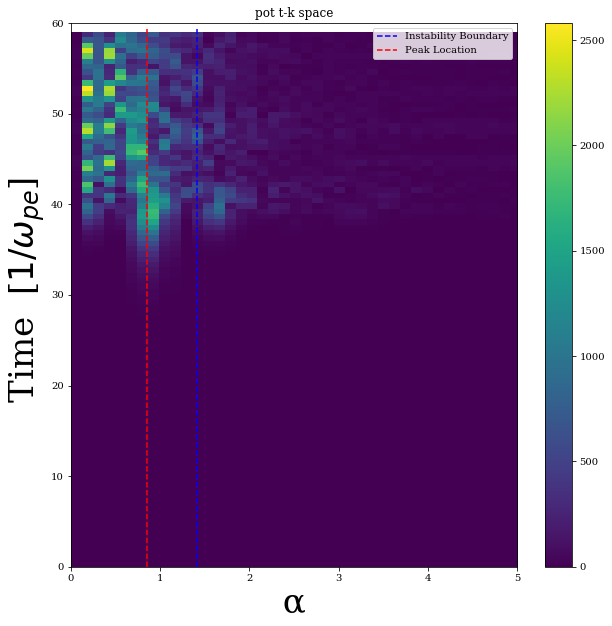

In [20]:
dirname = 'twostream'


osiris.plot_tk_2stream(dirname,'pot',klim=5,tlim=60,v0=5)

Plot the electrostatic potential modes individually and compare their growth rate to the theoretical growth rate. The most unstable mode is mode 7.

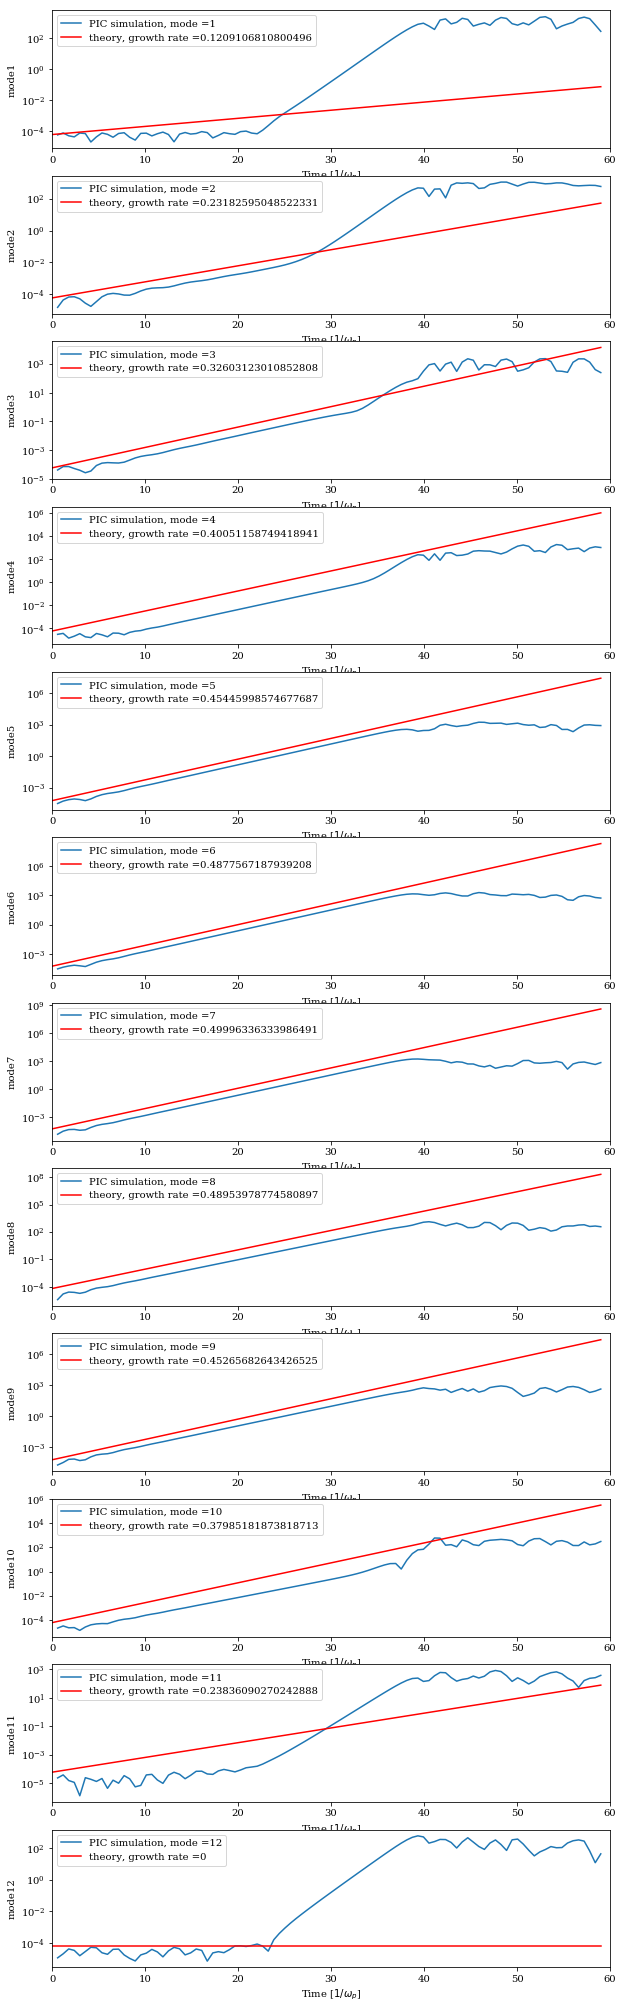

In [21]:
###  Here we compare results against theory
dirname = 'twostream'


osiris.plot_tk_2stream_theory(dirname,'pot',modemin=1,modemax=12,tlim=60,v0=5,init_amplitude=6e-5)


Plot the electrostatic potential through time.

* What do you notice about the fluctuations in space compared to Case 1?

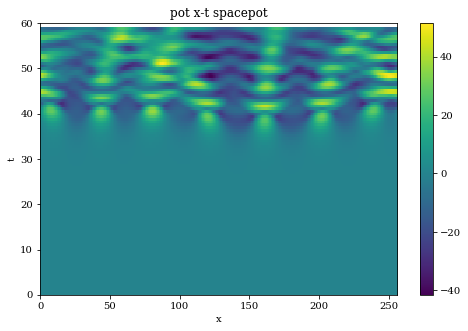

In [22]:
dirname = 'twostream'

#osiris.plot_wk_arb(rundir=dirname, field='pot', TITLE='potential',wlim=4, klim=3)
osiris.plot_xt_arb(rundir=dirname, field='pot' ,tlim=[0,60])

Visualize the phase space of the particles.

In [23]:
# Here you can see the evolution of phase space

dirname='twostream'

osiris.phaseinteract_upic(rundir=dirname)

interactive(children=(IntSlider(value=7, description='n', max=14), Output()), _dom_classes=('widget-interact',))

### Future work
The above notebook gives some examples of the 2-stream instability.  To explore the instability further, we suggest that you try the following:

*  Change the simulation box size to change the resolution in $\hat{k}$
*  Change the beam velocity (VX0 and VDX in the input deck)
*  Make the simulation time (TEND) longer to look at the nonlinear stages of the instability